In [1]:
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms, base, benchmarks, cma, creator, tools

In [2]:
#툴박스 생성 함수
def create_toolbox(strategy) : 
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin) 
    
    toolbox = base.Toolbox()
    toolbox.register("evaluate", benchmarks.rastrigin) 
    
    #난수 발생기의 시드 설정
    np.random.seed(7)
    
    toolbox.register("generate", strategy.generate, creator.Individual)
    toolbox.register("update", strategy.update)
    
    return toolbox

In [3]:
num_individuals = 10 
num_generations = 125

In [4]:
#CMA-ES 알고리즘을 사용하는 전략 생성하기
strategy = cma.Strategy(centroid=[5.0]*num_individuals, sigma=5.0, lambda_ = 20*num_individuals)
#정의한 전략에 따라 toolbox 생성
toolbox = create_toolbox(strategy)

In [12]:
#집단에서 가장 뛰언나 개체를 정렬된 상태로 저장
hall_of_fame = tools.HallOfFame(1)

In [13]:
#관련 통계 정보 등록
stats = tools.Statistics(lambda x: x.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

In [14]:
logbook = tools.Logbook()
logbook.header = "gen", "evals", "std", "min", "avg", "max"

In [15]:
#데이터를 컴파일할 오브젝트
sigma = np.ndarray((num_generations, 1))
axis_ratio = np.ndarray((num_generations, 1))
diagD = np.ndarray((num_generations, num_individuals))
fbest = np.ndarray((num_generations, 1))
best = np.ndarray((num_generations, num_individuals))
std = np.ndarray((num_generations, num_individuals))

In [17]:
for gen in range(num_generations) : 
    #새 집단 생성하기
    population = toolbox.generate()
    
    #개체 평가
    fitnesses = toolbox.map(toolbox.evaluate, population)
    for ind, fit in zip(population, fitnesses) : 
        ind.fitness.values = fit

    #평가한 개체에 맞게 전략 업데이트
    toolbox.update(population)
    #현재 평가된 집단에 맞게 명예의 전당과 통계 정보 업데이트
    hall_of_fame.update(population)
    record = stats.compile(population)
    logbook.record(evals=len(population), gen=gen, **record) 
    print(logbook.stream)

    #진화 과정을 그래프로 표현할 데이터 저장
    sigma[gen] = strategy.sigma
    axis_ratio[gen] = max(strategy.diagD)**2/min(strategy.diagD)**2
    diagD[gen, :num_individuals] = strategy.diagD**2
    fbest[gen] = hall_of_fame[0].fitness.values
    best[gen, :num_individuals] = hall_of_fame[0]
    std[gen, :num_individuals] = np.std(population, axis=0)

gen	evals	std    	min    	avg    	max    
0  	200  	195.389	250.768	635.542	1377.31
1  	200  	209.162	208.797	579.458	1363.59
2  	200  	343.829	188.293	715.869	2084.49
3  	200  	249.364	145.657	609.575	1631.87
4  	200  	184.217	147.377	474.197	1372.67
5  	200  	111.461	146.58 	363.298	751.078
6  	200  	75.1413	127.63 	264.206	530.614
7  	200  	59.3965	119.209	222.958	429.081
8  	200  	42.5582	77.725 	182.701	381.86 
9  	200  	39.5923	85.4996	165.852	286.749
10 	200  	33.2351	81.6733	154.931	283.873
11 	200  	25.9934	69.6125	135.427	210.875
12 	200  	30.1716	67.2467	139.815	236.954
13 	200  	27.8959	59.8502	133.436	234.714
14 	200  	27.7469	57.5135	127.717	232.327
15 	200  	23.9505	56.334 	125.503	178.054
16 	200  	25.3694	64.4703	121.653	192.885
17 	200  	24.037 	54.9676	117.831	187.502
18 	200  	22.4976	66.4896	119.618	181.027
19 	200  	24.0662	49.6202	116.458	182.813
20 	200  	22.6724	52.932 	112.648	170.471
21 	200  	23.7036	71.621 	117.678	199.007
22 	200  	22.5543	55.4728	115.504	

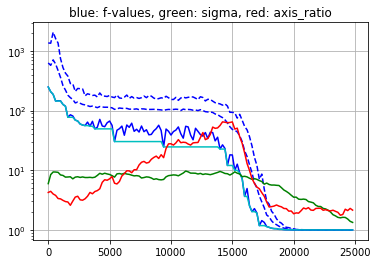

In [20]:
#x축: 진화 단계, y축: 결과값
x = list(range(0, strategy.lambda_*num_generations, strategy.lambda_))
avg, max_, min_ = logbook.select("avg", "max", "min")
plt.figure()
plt.semilogy(x, avg, "--b")
plt.semilogy(x, max_, "--b")
plt.semilogy(x, min_, "-b")
plt.semilogy(x, fbest, "-c")
plt.semilogy(x, sigma, "-g")
plt.semilogy(x, axis_ratio, "-r")
plt.grid(True)
plt.title("blue: f-values, green: sigma, red: axis_ratio")
plt.show()

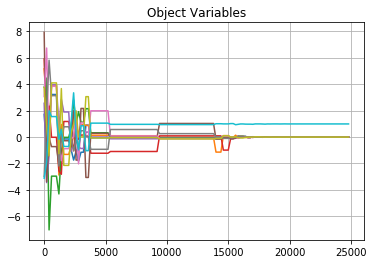

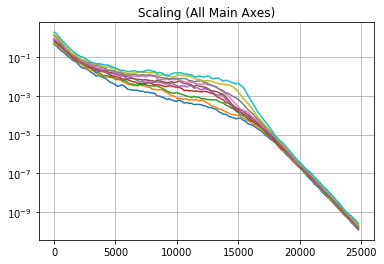

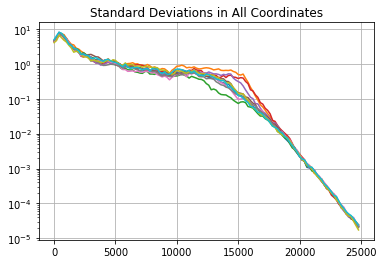

In [21]:
#진행 상태를 그래프에 표시
plt.figure()
plt.plot(x, best) 
plt.grid(True)
plt.title("Object Variables")

plt.figure()
plt.semilogy(x, diagD)
plt.grid(True)
plt.title("Scaling (All Main Axes)")

plt.figure()
plt.semilogy(x, std)
plt.grid(True)
plt.title("Standard Deviations in All Coordinates")
plt.show()